In [41]:
# importing google drive or mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('/content/drive/MyDrive/supply_chain_analytics/data/supply_chain_data.csv')

In [44]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [ ]:
"""The Information i claimed to be the part is (
  Sales (prices, quantities sold, revenue)

Inventory (stock levels, availability)

Supply chain operations (lead times, shipping costs, carriers)

Quality (defect rates, inspection results)

Suppliers and locations
)"""

In [45]:
df.shape

(100, 24)

In [46]:
df.isnull().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


In [47]:
for col in df.columns:
  if df[col].dtype == 'object':
    unique_values = df[col].nunique()
    print(f'{col}: {unique_values} unique values (categorical)')
  else:
    print(f'{col}: {df[col].dtype} ^^ range: MIN: {df[col].min():.2f} MAX: {df[col].max():.2f}')


Product type: 3 unique values (categorical)
SKU: 100 unique values (categorical)
Price: float64 ^^ range: MIN: 1.70 MAX: 99.17
Availability: int64 ^^ range: MIN: 1.00 MAX: 100.00
Number of products sold: int64 ^^ range: MIN: 8.00 MAX: 996.00
Revenue generated: float64 ^^ range: MIN: 1061.62 MAX: 9866.47
Customer demographics: 4 unique values (categorical)
Stock levels: int64 ^^ range: MIN: 0.00 MAX: 100.00
Lead times: int64 ^^ range: MIN: 1.00 MAX: 30.00
Order quantities: int64 ^^ range: MIN: 1.00 MAX: 96.00
Shipping times: int64 ^^ range: MIN: 1.00 MAX: 10.00
Shipping carriers: 3 unique values (categorical)
Shipping costs: float64 ^^ range: MIN: 1.01 MAX: 9.93
Supplier name: 5 unique values (categorical)
Location: 5 unique values (categorical)
Lead time: int64 ^^ range: MIN: 1.00 MAX: 30.00
Production volumes: int64 ^^ range: MIN: 104.00 MAX: 985.00
Manufacturing lead time: int64 ^^ range: MIN: 1.00 MAX: 30.00
Manufacturing costs: float64 ^^ range: MIN: 1.09 MAX: 99.47
Inspection resu

In [48]:
df.head(1)
print(df.describe(include='all'))

       Product type   SKU       Price  Availability  Number of products sold  \
count           100   100  100.000000    100.000000               100.000000   
unique            3   100         NaN           NaN                      NaN   
top        skincare  SKU0         NaN           NaN                      NaN   
freq             40     1         NaN           NaN                      NaN   
mean            NaN   NaN   49.462461     48.400000               460.990000   
std             NaN   NaN   31.168193     30.743317               303.780074   
min             NaN   NaN    1.699976      1.000000                 8.000000   
25%             NaN   NaN   19.597823     22.750000               184.250000   
50%             NaN   NaN   51.239831     43.500000               392.500000   
75%             NaN   NaN   77.198228     75.000000               704.250000   
max             NaN   NaN   99.171329    100.000000               996.000000   

        Revenue generated Customer demo

In [49]:
cat_col = df.select_dtypes(include='object').columns
df[cat_col].head()
df['SKU'].nunique()


100

In [67]:
df['revenue per unit'] = (df['Revenue generated'] / df['Number of products sold'] + 1)


In [51]:
# from sklearn.preprocessing import LabelEncoder
# import pickle

# le = LabelEncoder()
# copy_df = df.copy()
# for col in df[cat_col]:
#   copy_df[col] = le.fit_transform(df[col])

# with open('/content/drive/MyDrive/supply_chain_analytics/preprocessors/sku_encoder.pkl', 'wb') as f:
#   pickle.dump(le, f)

In [52]:
copy_df = df.copy()
correlation = copy_df.corr()
plt.figure(figsize=(14, 7))

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
plt.savefig('corre.png')

ValueError: could not convert string to float: 'haircare'

In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [ ]:
# from numpy import ndarray
# def scale(train_data):
#   mean = train_data.mean(axis=0)
#   train_data -= mean

#   std = train_data.std(axis=0)

#   train_data /= std

#   return train_data.to_numpy()

# train_df = scale(copy_df)

In [54]:
copy_df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [55]:
copy_df['Shipping costs']

,Shipping costs
0,2.956572
1,9.716575
2,8.054479
3,1.729569
4,3.890548
...,...
95,8.630339
96,5.352878
97,7.904846
98,1.409801


In [56]:
copy_df['Shipping costs'][0]

np.float64(2.956572139430807)

In [57]:
copy_df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [58]:
96*802+187+2.95

77181.95

In [59]:
copy_df['SKU'].value_counts(ascending=False).index

Index(['SKU0', 'SKU1', 'SKU2', 'SKU3', 'SKU4', 'SKU5', 'SKU6', 'SKU7', 'SKU8',
       'SKU9', 'SKU10', 'SKU11', 'SKU12', 'SKU13', 'SKU14', 'SKU15', 'SKU16',
       'SKU17', 'SKU18', 'SKU19', 'SKU20', 'SKU21', 'SKU22', 'SKU23', 'SKU24',
       'SKU25', 'SKU26', 'SKU27', 'SKU28', 'SKU29', 'SKU30', 'SKU31', 'SKU32',
       'SKU33', 'SKU34', 'SKU35', 'SKU36', 'SKU37', 'SKU38', 'SKU39', 'SKU40',
       'SKU41', 'SKU42', 'SKU43', 'SKU44', 'SKU45', 'SKU46', 'SKU47', 'SKU48',
       'SKU49', 'SKU50', 'SKU51', 'SKU52', 'SKU53', 'SKU54', 'SKU55', 'SKU56',
       'SKU57', 'SKU58', 'SKU59', 'SKU60', 'SKU61', 'SKU62', 'SKU63', 'SKU64',
       'SKU65', 'SKU66', 'SKU67', 'SKU68', 'SKU69', 'SKU70', 'SKU71', 'SKU72',
       'SKU73', 'SKU74', 'SKU75', 'SKU76', 'SKU77', 'SKU78', 'SKU79', 'SKU80',
       'SKU81', 'SKU82', 'SKU83', 'SKU84', 'SKU85', 'SKU86', 'SKU87', 'SKU88',
       'SKU89', 'SKU90', 'SKU91', 'SKU92', 'SKU93', 'SKU94', 'SKU95', 'SKU96',
       'SKU97', 'SKU98', 'SKU99'],
      dtype='objec

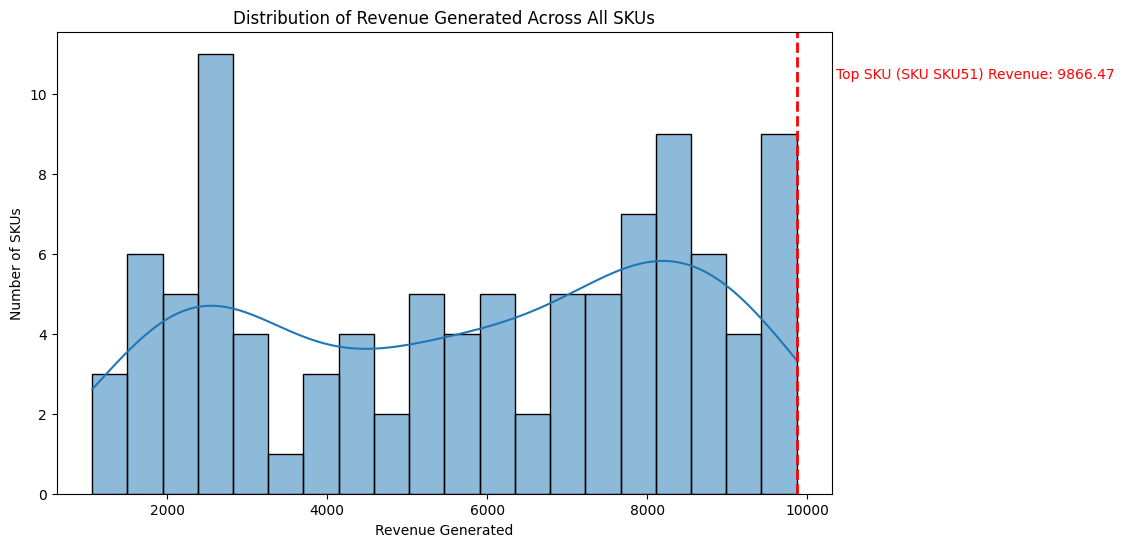

The top performing SKU (SKU SKU51) has a revenue of $9866.47


In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(copy_df['Revenue generated'], bins=20, kde=True)
plt.title('Distribution of Revenue Generated Across All SKUs')
plt.xlabel('Revenue Generated')
plt.ylabel('Number of SKUs')

top_revenue_sku_data = copy_df.loc[copy_df['Revenue generated'].idxmax()]
top_sku_index = top_revenue_sku_data['SKU']
top_sku_revenue = top_revenue_sku_data['Revenue generated']

plt.axvline(top_sku_revenue, color='red', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(top_sku_revenue*1.05, max_ylim*0.9, f'Top SKU (SKU {top_sku_index}) Revenue: {top_sku_revenue:.2f}', color='red')

plt.show()
print(f"The top performing SKU (SKU {top_sku_index}) has a revenue of ${top_sku_revenue:.2f}")

In [61]:
copy_df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


<Axes: >

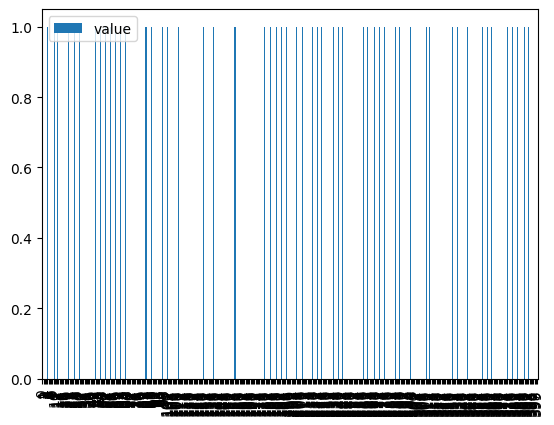

In [65]:
sku_demographics = copy_df.groupby(['Customer demographics', 'SKU']).size().unstack(level='SKU').fillna(0)